#### Imports

In [13]:
import os
import sys

# --- PATH SETUP ---
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '../..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.prediction.estimator import EnergyEstimator



Model loaded from c:\Users\MOSTAFA\Desktop\Foundations of ML Frameworks\Final Project\Project\Sustainable_AI_G3-\model\energy_predictor\energy_model_RandomForest.pkl
Random Forest Estimation Results: {'energy_kwh': np.float64(1.0717), 'carbon_kg': np.float64(0.5091), 'suggestion': '✅ Optimized.', 'token_count': 1, 'predicted_val': np.float64(1.0717489960395665)}


C:\Users\MOSTAFA\AppData\Local\Temp\ipykernel_39012\398671146.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


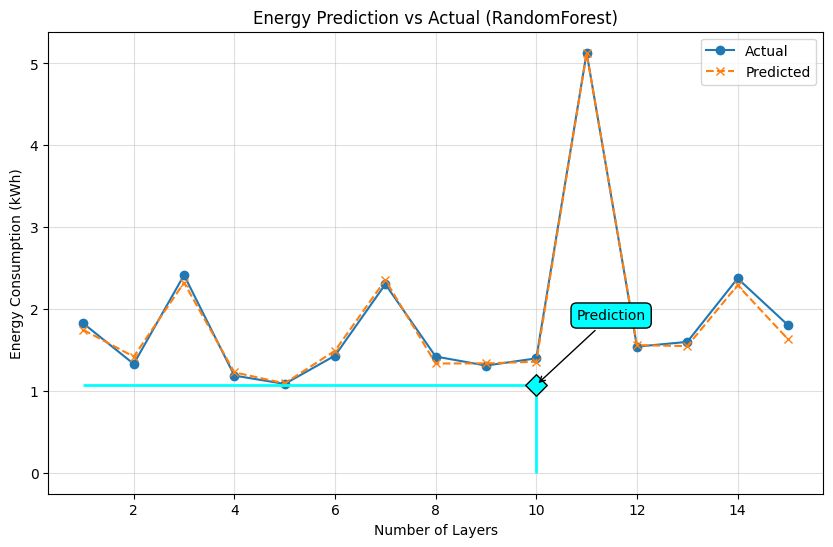

In [14]:
# Initialize estimators - Random Forest and Linear Regression
estimator_random_forest = EnergyEstimator(model_type="RandomForest")

# Estimate energy consumption using Random Forest estimator
results_random_forest = estimator_random_forest.estimate("hello", 10, 5, 1.5e18)

print("Random Forest Estimation Results:", results_random_forest)

# Extract predicted energy for plotting
predicted_energy = results_random_forest['energy_kwh']

# Generate and display training plot for Random Forest estimator
fig = estimator_random_forest.get_training_plot(10, predicted_energy)
fig.show()


Model loaded from c:\Users\MOSTAFA\Desktop\Foundations of ML Frameworks\Final Project\Project\Sustainable_AI_G3-\model\energy_predictor\energy_model_LinearRegression.pkl
Linear Regression Estimation Results: {'energy_kwh': np.float64(0.3339), 'carbon_kg': np.float64(0.1586), 'suggestion': '✅ Optimized.', 'token_count': 1, 'predicted_val': np.float64(0.33394408787012547)}


C:\Users\MOSTAFA\AppData\Local\Temp\ipykernel_39012\636071440.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


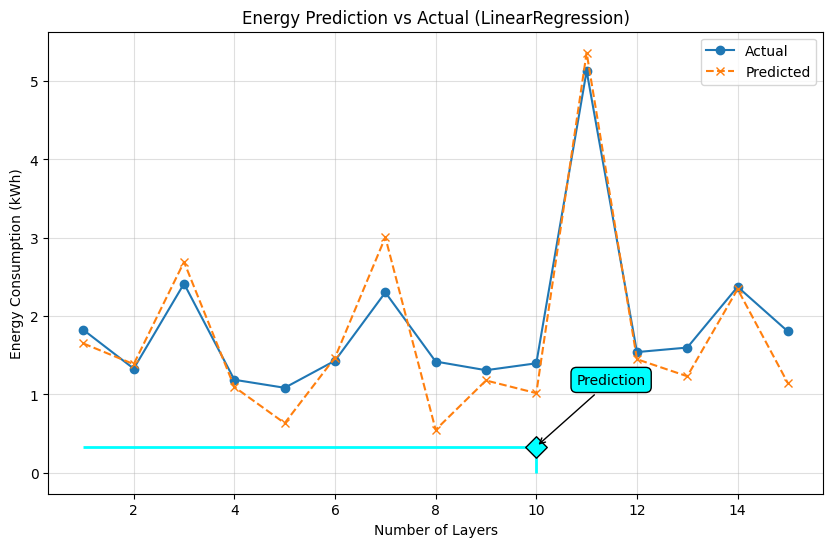

In [15]:
# Initialize Linear Regression estimator
estimator_linear_regression = EnergyEstimator(model_type="LinearRegression")

# Estimate energy consumption using Linear Regression estimator
results_linear_regression = estimator_linear_regression.estimate("hello", 10, 5, 1.5e18)

print("Linear Regression Estimation Results:", results_linear_regression)

# Extract predicted energy for plotting
predicted_energy = results_linear_regression['energy_kwh']

# Generate and display training plot for Linear Regression estimator
fig = estimator_linear_regression.get_training_plot(10, predicted_energy)
fig.show()